In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import direct_plugin
from kdelearn.metrics import pi_kf

from sklearn.neighbors import NearestNeighbors

Weźmy 1000 elementów z rozkładu N(0,1) i m elementów z rozkładu N(0,25) (25 to wariancja, odchylenie 5). Znajdźmy podział optymalny w sensie naszego wskaźnika dla m po kolei 0, 10, 20, 50, 100, 200, 500, 1000.

Siatka dla r: (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2)

Ustalone k=10

\newpage

m_noise=0
Wynik podstawowy przy r=0.05, k=10


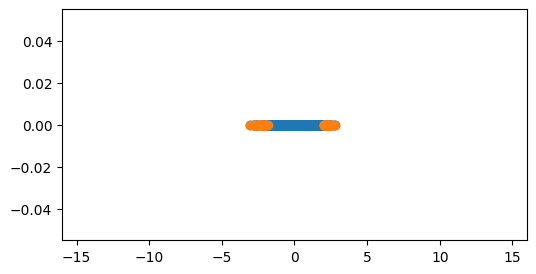

Wskaźnik jakości: 0.463070
Liczba nietypowych elementów: 50/1000 (5.000%)

Wynik po optymalizacji


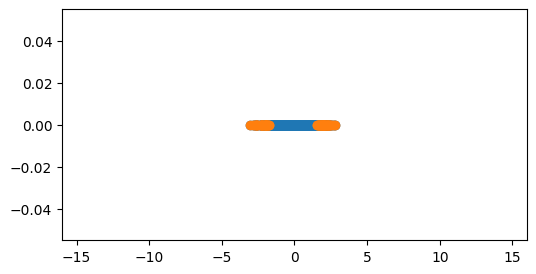

Najlepsze r 0.08
Wskaźnik jakości: 0.452891
Liczba nietypowych elementów: 80/1000 (8.000%)

------------------------------
m_noise=10
Wynik podstawowy przy r=0.05, k=10


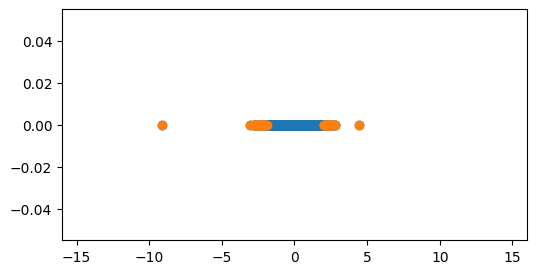

Wskaźnik jakości: 0.435187
Liczba nietypowych elementów: 51/1010 (5.050%)

Wynik po optymalizacji


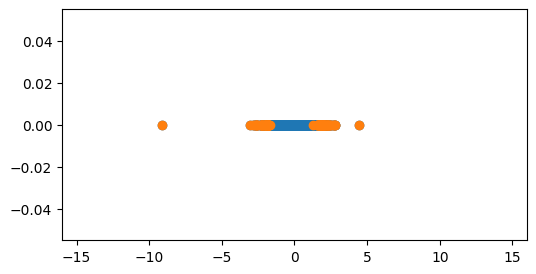

Najlepsze r 0.10
Wskaźnik jakości: 0.427018
Liczba nietypowych elementów: 101/1010 (10.000%)

------------------------------
m_noise=20
Wynik podstawowy przy r=0.05, k=10


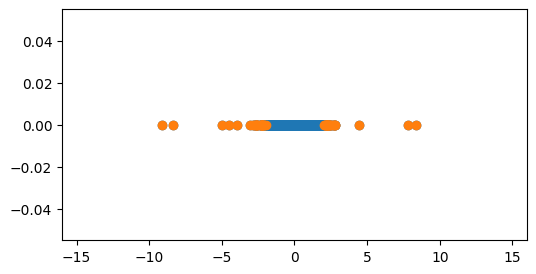

Wskaźnik jakości: 0.365399
Liczba nietypowych elementów: 51/1020 (5.000%)

Wynik po optymalizacji


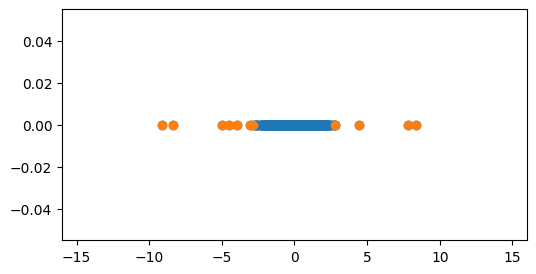

Najlepsze r 0.01
Wskaźnik jakości: 0.229001
Liczba nietypowych elementów: 11/1020 (1.078%)

------------------------------
m_noise=50
Wynik podstawowy przy r=0.05, k=10


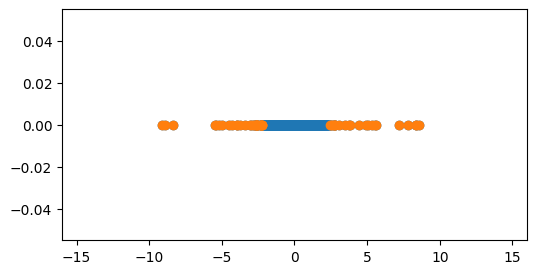

Wskaźnik jakości: 0.221792
Liczba nietypowych elementów: 53/1050 (5.048%)

Wynik po optymalizacji


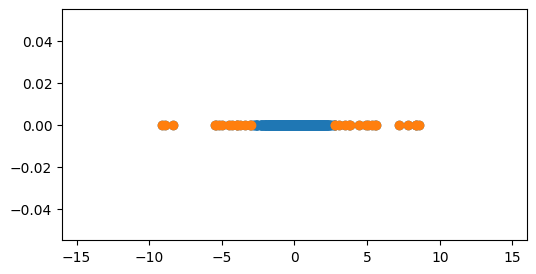

Najlepsze r 0.03
Wskaźnik jakości: 0.154534
Liczba nietypowych elementów: 32/1050 (3.048%)

------------------------------
m_noise=100
Wynik podstawowy przy r=0.05, k=10


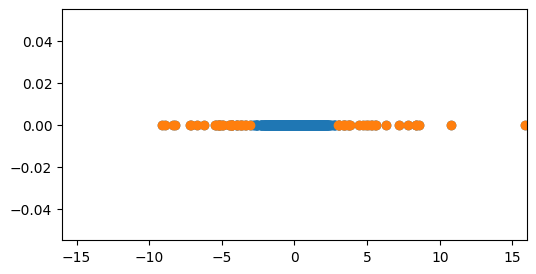

Wskaźnik jakości: 0.163859
Liczba nietypowych elementów: 55/1100 (5.000%)

Wynik po optymalizacji


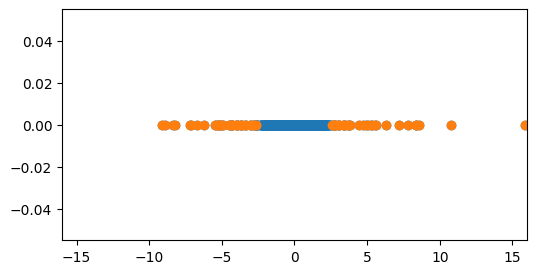

Najlepsze r 0.06
Wskaźnik jakości: 0.151361
Liczba nietypowych elementów: 66/1100 (6.000%)

------------------------------
m_noise=200
Wynik podstawowy przy r=0.05, k=10


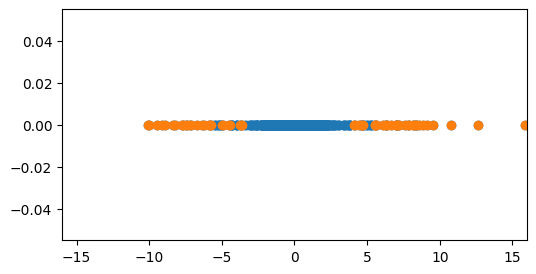

Wskaźnik jakości: 0.425756
Liczba nietypowych elementów: 60/1200 (5.000%)

Wynik po optymalizacji


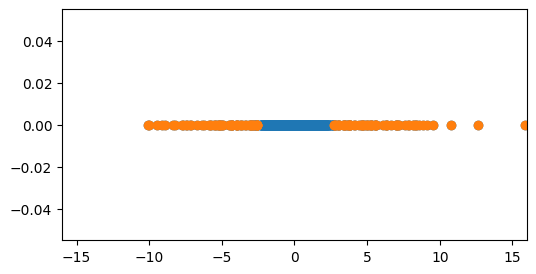

Najlepsze r 0.10
Wskaźnik jakości: 0.139422
Liczba nietypowych elementów: 120/1200 (10.000%)

------------------------------
m_noise=500
Wynik podstawowy przy r=0.05, k=10


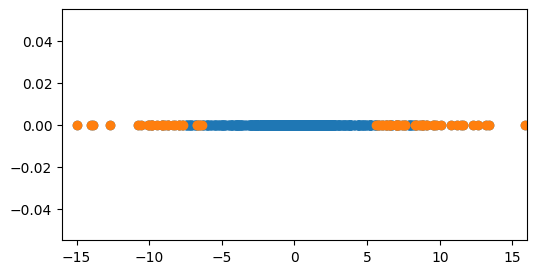

Wskaźnik jakości: 0.449781
Liczba nietypowych elementów: 75/1500 (5.000%)

Wynik po optymalizacji


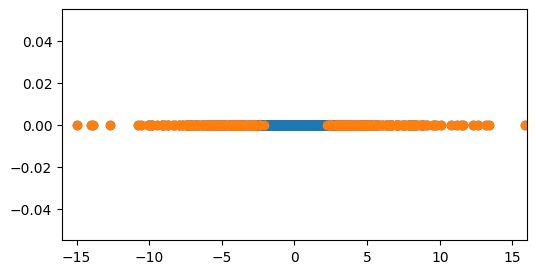

Najlepsze r 0.20
Wskaźnik jakości: 0.197568
Liczba nietypowych elementów: 300/1500 (20.000%)

------------------------------
m_noise=1000
Wynik podstawowy przy r=0.05, k=10


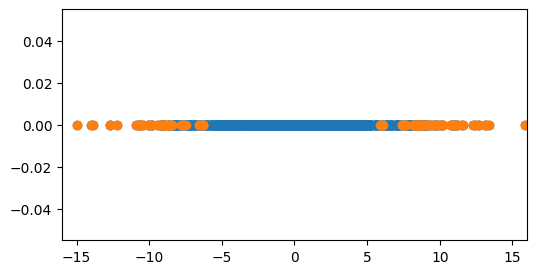

Wskaźnik jakości: 0.545502
Liczba nietypowych elementów: 100/2000 (5.000%)

Wynik po optymalizacji


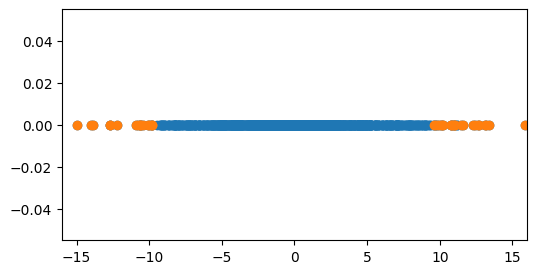

Najlepsze r 0.02
Wskaźnik jakości: 0.359444
Liczba nietypowych elementów: 40/2000 (2.000%)

------------------------------


In [2]:
n = 1
m_train1 = 1000
    
r_grid = (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,
          0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2)

for m_noise in [0, 10, 20, 50, 100, 200, 500, 1000]:
    np.random.seed(0)
    print(f"{m_noise=:}")
    print("Wynik podstawowy przy r=0.05, k=10")
    
    # Data
    x_train1 = np.random.normal(0, 1, size=(m_train1, n))
    x_train2 = np.random.normal(0, 5, size=(m_noise, n))
    x_train = np.concatenate((x_train1, x_train2))
    m_train = x_train.shape[0]
    
    bandwidth = direct_plugin(x_train)

    # Outliers detection
    k = 10  # int(np.sqrt(m_train))
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    r = 0.05
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)
    metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 0]*0)
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 0]*0)
    plt.xlim(-16, 16)
    plt.show()
    
    print(f"Wskaźnik jakości: {metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
    # Dopasowanie parametrów na siatce
    print("Wynik po optymalizacji")
    
    best_metric = np.inf
    for r in r_grid:
#         nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
#         distances, indices = nbrs.kneighbors(x_train)
#         dist_k = np.max(distances, axis=1)
        threshold = np.quantile(dist_k, 1 - r)
        labels_pred = np.where(dist_k >= threshold, 1 ,0)
        metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)
        if metric < best_metric:
            best_r = r
            best_metric = metric

    # Outliers detection
#     nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
#     distances, indices = nbrs.kneighbors(x_train)
#     dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - best_r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 0]*0)
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 0]*0)
    plt.xlim(-16, 16)
    plt.show()

    print(f"Najlepsze r {best_r:.2f}")
    print(f"Wskaźnik jakości: {best_metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
    print("-" * 30)